# Page View Time Series Visualizer

* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [43]:
df=pd.read_csv('fcc-forum-pageviews.csv',parse_dates=[0])
df


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [44]:
df=df[(df['value']>df['value'].quantile(0.025))&(df['value']<df['value'].quantile(0.975))]
df1=df.set_index('date')

In [45]:
df1

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

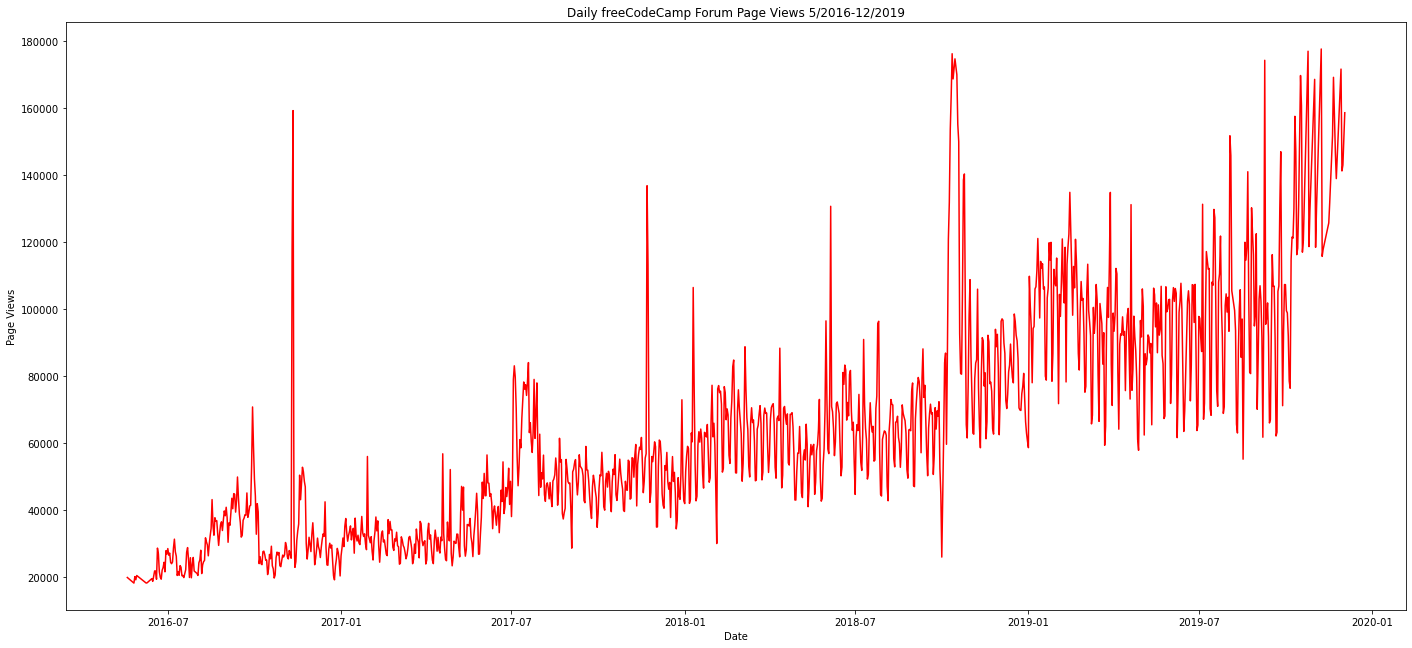

In [46]:
df1.plot(figsize=(24,12),legend=None,color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.xticks(rotation=0,ha='center')
plt.ylabel('Page Views')
plt.show()

* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [47]:
df2=df.copy()
df2['Year']= df2['date'].dt.year
df2['Month']= df2['date'].dt.month
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]


In [62]:

barras=df2.groupby(['Year','Month']).mean().reset_index()
barras

,Year,Month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [49]:
ey=barras.pivot(index='Year',columns='Month',values='value')
ey

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


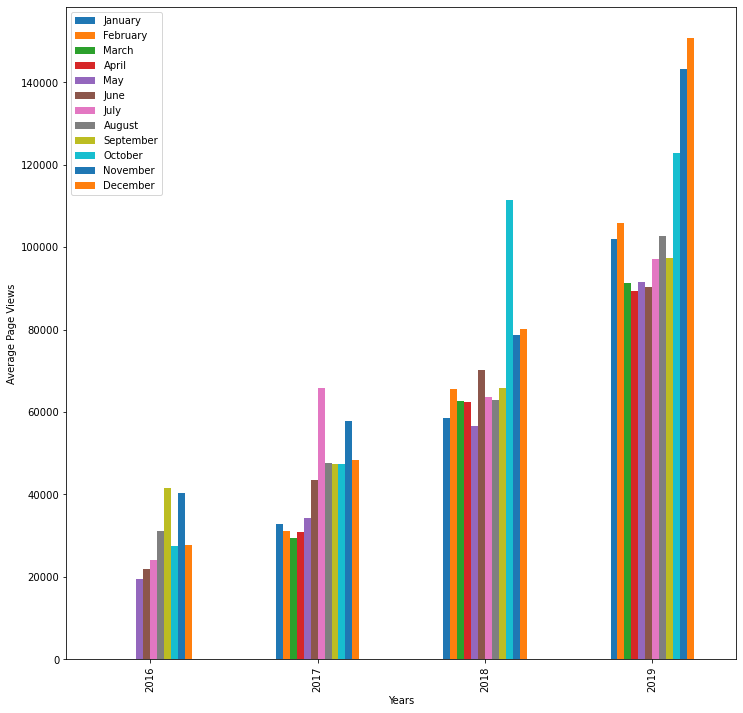

In [50]:
ey.plot.bar(figsize=(12,12))
plt.xlabel('Years')
plt.legend(months)
plt.xticks(rotation=90,ha='center')
plt.ylabel('Average Page Views')
plt.show()


* Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [54]:
df_box=df.copy()
df_box

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [64]:

df_box.reset_index(inplace=True)
df_box['Year'] = [d.year for d in df_box.date]
df_box['Month'] = [d.strftime('%b') for d in df_box.date]

In [65]:
df_box

,level_0,index,date,value,year,month,Year,Month
0,0,10,2016-05-19,19736,2016,May,2016,May
1,1,17,2016-05-26,18060,2016,May,2016,May
2,2,18,2016-05-27,19997,2016,May,2016,May
3,3,19,2016-05-28,19044,2016,May,2016,May
4,4,20,2016-05-29,20325,2016,May,2016,May
...,...,...,...,...,...,...,...,...
1233,1233,1294,2019-11-24,138875,2019,Nov,2019,Nov
1234,1234,1299,2019-11-29,171584,2019,Nov,2019,Nov
1235,1235,1300,2019-11-30,141161,2019,Nov,2019,Nov
1236,1236,1301,2019-12-01,142918,2019,Dec,2019,Dec


Text(0, 0.5, 'Page Views')

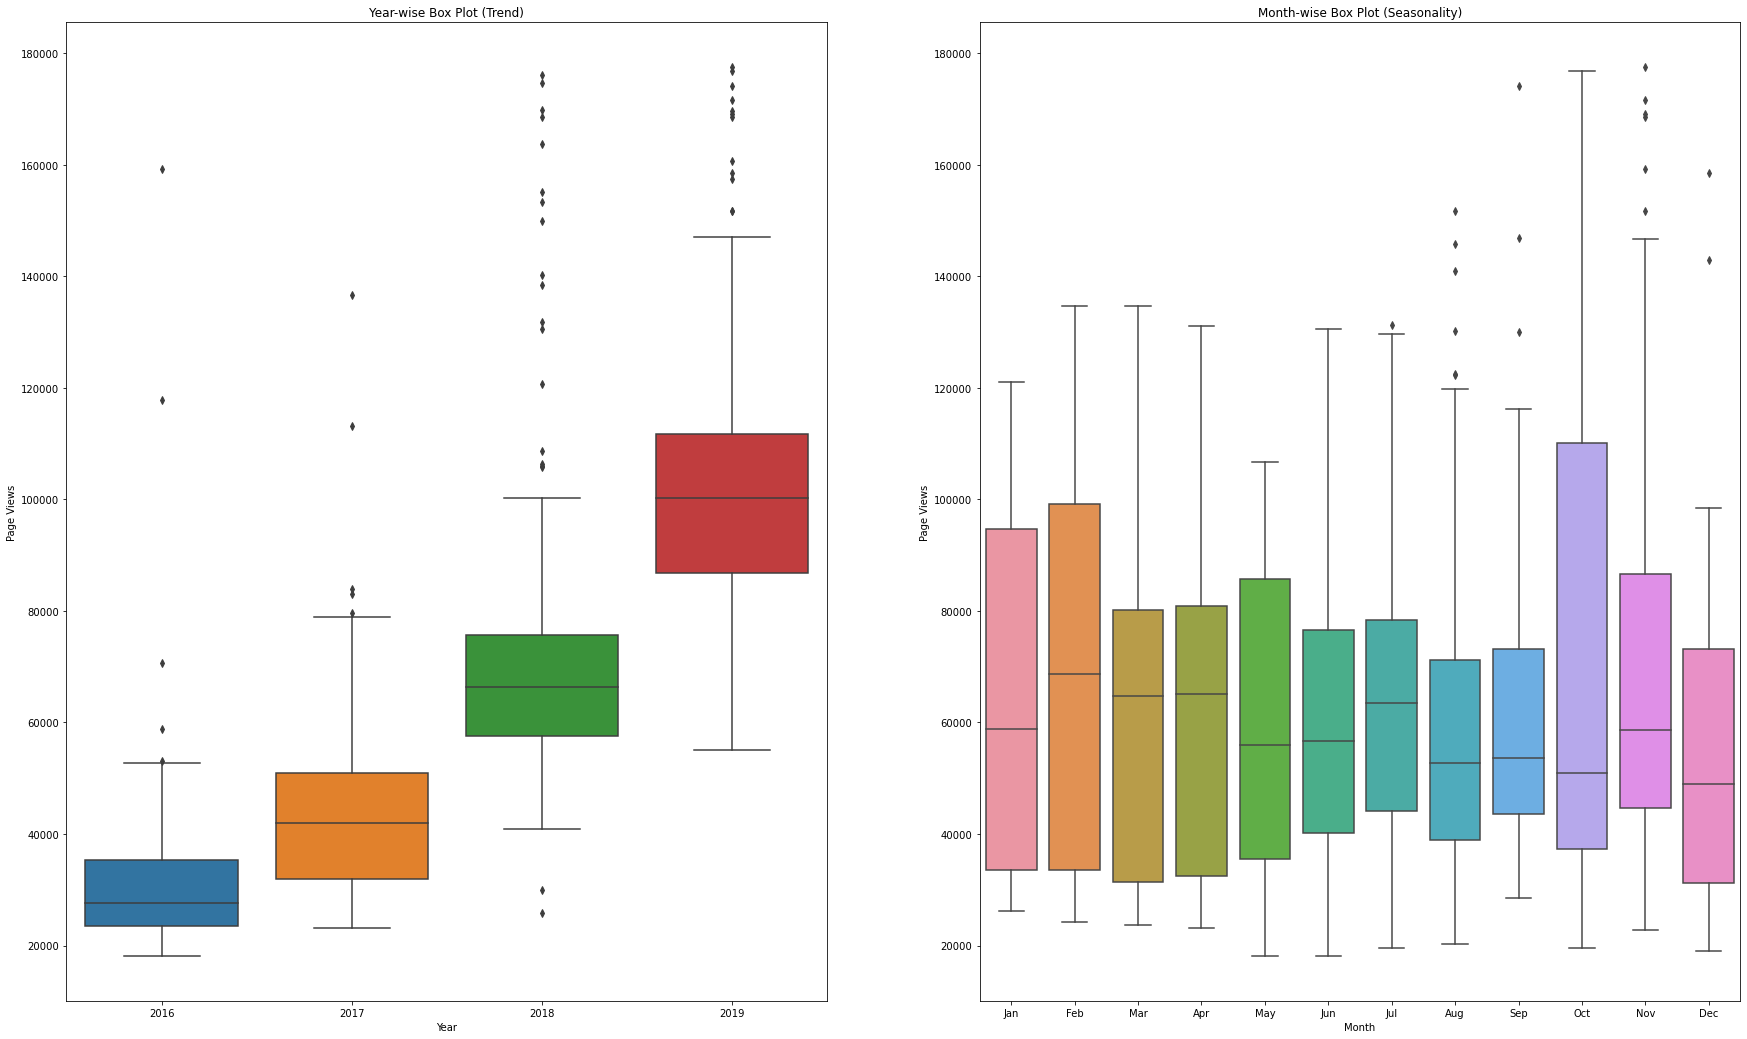

In [67]:
plt.figure(figsize=(30, 18))


plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.title("Year-wise Box Plot (Trend)")
sns.boxplot(x="Year", y="value", data=df_box)
plt.ylabel('Page Views')

plt.subplot(1, 2, 2)
plt.title("Month-wise Box Plot (Seasonality)")
sns.boxplot(x="Month", y="value", data=df_box,order=["Jan", "Feb","Mar", "Apr","May", "Jun","Jul", "Aug","Sep", "Oct","Nov", "Dec",])
plt.ylabel('Page Views')

